<a href="https://colab.research.google.com/github/IA2122/practica-6-paochoa/blob/main/practica6_adicional1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 6. Ejercicio adicional 1: Preprocesado de datos

La calidad de los datos y la cantidad de información relevante que dichos datos contienen son factores clave a la hora de que un algoritmo de aprendizaje sea capaz de aprender. En este notebook se ven distintas técnicas de preprocesado de datos y su impacto a la hora de entrenar modelos. 

## 0. Carga de librerías y del dataset 

Para este notebook vamos a utilizar el dataset del Vino, otro dataset open-source que está disponible en el [repositorio UCI](https://archive.ics.uci.edu/ml/datasets/wine). Este dataset consiste en 178 muestras de vinos y 13 descriptores de distintas propiedades químicas. 

Usando pandas vamos a descargar directamente dicho dataset. También definimos en la siguiente celda el nombre de las columnas.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                     header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malid acid', 'Ash', 'Alcalinity of ash', 
                  'Magnesium', 'Total phenols','Flavanoids','Nonflavanoid phenols', 
                  'Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines',
                  'Proline']

A continuación podemos ver las categorías de vinos de nuestro dataset.

In [3]:
print('Class labels',np.unique(df_wine['Class label']))

Class labels [1 2 3]


##### Pregunta
¿Cuántas clases hay?

Respuesta. 

Hay 3 clases

**Ejercicio** Muestra las primeras filas del dataset.

In [5]:
df_wine.head(100)

,Class label,Alcohol,Malid acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
97,2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428
98,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660


##### Ejercicio
La variable `df_wine` contiene tanto las etiquetas como los descriptores, separa dicha variable en las variables `X` e `y` como hemos hecho en otras ocasiones. Date cuenta que en este caso la etiqueta no la proporciona la última columna sino la primera, y que los descriptores van desde la columna 1 hasta la última. 

In [25]:
X = df_wine.values[:,1:] # si se pone esto con iloc se devuelve un dataframe, por lo que no se puede hacer X[0], sin embargo, values devuelve un vector
y = df_wine.values[:,0]

La siguiente celda debería producir los siguientes resultados:

| Expresión | Resultado |
|---|---|
| X[0] | [  1.42300000e+01,1.71000000e+00,2.43000000e+00,1.56000000e+01,1.27000000e+02,2.80000000e+00   3.06000000e+00,2.80000000e-01,2.29000000e+00,5.64000000e+00, 1.04000000e+00,3.92000000e+00,1.06500000e+03] |
| y[5] | 1.0 |

In [27]:
print(X[0])
print(y[5])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
1.0


##### Ejercicio
Como hacemos de manera habitual vamos a partir el dataset en los conjuntos de entrenamiento y test. Utiliza el 30% para el conjunto de test y usa como `random_state` el valor 0.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

## 1. Escalando los descriptores

El escalado de los descriptores es un paso habitual de preprocesamiento. La mayoría de algoritmos de aprendizaje aprenden mucho mejor cuando los descriptores están en la misma escala. 

La importancia de escalar los descriptores se puede ilustrar con el siguiente ejemplo. Suponed que tenemos dos descriptores donde un descriptor se mide en una escala de 1 a 10 y otra se mide en una escala 1 a 100000. Cuando pensamos en el error cuadrático, es intuitivo que los algoritmos de optimización ajustarán los pesos de acuerdo a los errores producidos en el segundo descriptor. Otro ejemplo sería en el algoritmo KNN con la medida Euclídea, donde el cálculo de las distancias va a estar dominado por el segundo descriptor.

Existen dos aproximaciones distintas para escalar los descriptores: la normalización y la estandarización.

### 1.1. Normalización

La normalización se refiere al proceso de reescalar los descriptores en el rango $[0,1]$. Para llevar a cabo este reescalado se puede aplicar el escalado min-max a cada columna de un descriptor. En concreto para calcular este valor usamos la siguiente fórmula:
$$x_{norm}^{(i)} = \frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}$$
donde $x_{norm}^{(i)}$ es el nuevo valor de la instancia $i$ del dataset para un descriptor, $x^{(i)}$ es el valor original de la instancia para ese descriptor, $x_{min}$ es el menor valor que toma ese descriptor para todas las instancias del dataset, y $x_{max}$ es el mayor valor que toma ese descriptor para todas las instancias del dataset.

Este procedimiento está implementado en sklearn y puede usarse del siguiente modo. Importamos la librería y definimos un objeto de la clase `MinMaxScaler`.

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

Llevamos a cabo el reescalado tanto del conjunto de entrenamiento utilizando la función `fit_transform` del objeto `mms`, y luego reescalamos el conjunto de test utilizando la función `transform`. Esto se hace para que el reescalado del conjunto de test utilice los mismos valores de reescalado que el conjunto de entrenamiento.

In [32]:
# se hace así y no normalizando X porque sino se cogería infor del conjunto de test para el de entrenamiento
# Por ejemplo si el de test tuviese un máximo, al normalizar X se normalizaría usando ese valor
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### 1.2. Estandarización

La normalización es una técnica útil cuando necesitamos que los nuevos valores de los descriptores estén en un intervalo, la estandarización puede ser más útil para los algoritmos de aprendizaje. La razón es que muchos algoritmos como la regresión logística, SVMs o las redes neuronales inicializan los pesos a 0 o a valores aleatoreos cercanos a 0. Usando la estandarización se consiguen centrar las columnas de descriptores con media 0 y desviación típica 1 de modo que las columnas de descriptores toman la forma de una distribución normal lo que hace que se aprendan de manera más sencilla los pesos. 

El proceso de estandarización viene dado por la siguiente fórmula:
$$x^{(i)}_{std} = \frac{x^{(i)}-\mu_x}{\sigma_x}$$
donde $\mu_x$ es la media de la muestra para cada columna de descriptores, $\sigma_x$ es la desviación típica, y $x^{(i)}_{std}$ es el valor calculado a partir del original $x^{(i)}$.

La siguiente tabla muestra la diferencia entre los valores normalizados y estandarizados en un dataset que contiene los números del 0 al 5. 

| Entrada | Estandarizado | Normalizado |
| --- | --- | --- |
| 0.0 | -1.33 | 0.0 |
| 1.0 | -0.8 | 0.2 |
| 2.0 | -0.26 | 0.4 |
| 3.0 | 0.26 | 0.6 |
| 4.0 | 0.8 | 0.8 |
| 5.0 | 1.33 | 1.0 |

Al igual que para la normalización, sklearn también implementa la estandarización y se utiliza del mismo modo.

In [33]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 2. Seleccionando descriptores relevantes

Cuando un modelo funciona mucho mejor en el conjunto de entrenamiento que en el de test, estos es un claro caso de _sobreajuste_. Es decir, que el modelo ha ajustado sus parámetros para funcionar bien en el conjunto de entrenamiento pero no generaliza bien a datos reales. Existen distintas técnicas para reducir el sobreajuste, la más sencilla pero también más complicada de llevar a cabo consiste en conseguir más datos para entrenar el modelo; esto en muchas ocasiones no es posible. En este apartado vamos a ver otra técnica que reduce el sobreajuste utilizando la reducción de dimensionalidad. 

Ya vimos que existen dos tipos de técnicas para reducir la dimensionalidad: la selección de descriptores y la extracción de descriptores. En este apartado nos vamos a centrar en el uso del método de selección secuencial hacia atrás. Este algoritmo no está implementado por defecto en sklearn, pero lo tienes disponible en el fichero sbs.py. Vamos a ver como funciona nuestro selector de descriptores utilizando el clasificador KNN. Comentamos cargando las librerías necesarias. 

Necesitamos primero descargar el fichero sbs con la funcionalidad necesaria. 

In [34]:
!wget https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py -O sbs.py

--2022-04-06 14:27:04--  https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1691 (1.7K) [text/plain]
Saving to: ‘sbs.py’

sbs.py              100%[===================>]   1.65K  --.-KB/s    in 0s      

2022-04-06 14:27:04 (13.0 MB/s) - ‘sbs.py’ saved [1691/1691]



In [35]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sbs import SBS
%matplotlib inline

Construimos el clasificador.

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)

Construimos nuestro selector de descriptores y le indicamos que al menos tiene que tomar 1 descriptor. El proceso consiste en construir una instancia de la clase `SBS` donde le indicamos el clasificador y el mínimo número de descriptores, y luego entrenarla.

In [37]:
sbs= SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

El objeto de la clase sbs almacena las puntuaciones de los mejores subconjuntos de descriptores en cada paso utilizando una parte del conjunto de test como conjunto de validación, así que podemos mostrar la precisión del clasificador para los distintos subconjuntos.

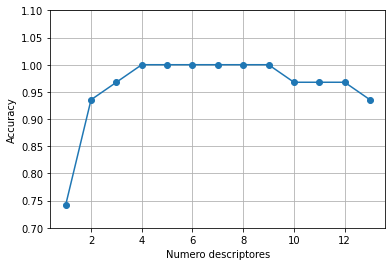

In [38]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Numero descriptores')
plt.grid()
plt.show()

Como se puede ver en la figura anterior la accuracy del algoritmo KNN aumenta al reducir el número de descriptores lo cual se debe a la maldición de la dimensionalidad. Como se puede ver en la gráfica, el algoritmo KNN alcanza una accuracy del 100% utilizando entre 5 y 11 descriptores. 

Podemos tomar los 5 descriptores más relevantes y ver cuáles son. Como estamos utilizando la eliminación hacia atrás para acceder a los 5 descriptores más relevantes tenemos que acceder al campo `subsets_` (que es una lista) e indicarle el índice que sería 13 (número total de descriptores) - 5 (número de descriptores con los que nos quedamos).

In [39]:
k5 = list(sbs.subsets_[8]) 
print(df_wine.columns[1:][k5])

Index(['Malid acid', 'Total phenols', 'Flavanoids', 'Color intensity',
       'Proline'],
      dtype='object')


Vamos ahora a evaluar el rendimiento del clasificador KNN en el conjunto de test. Primero lo consideramos sin estandarizar. 

In [40]:
knn.fit(X_train,y_train)
print('Training accuracy:', knn.score(X_train,y_train)) # aquí hay un claro ejemplo de sobreajuste, ya que la diferencia de precisión en ambos conjuntos en mayor de 20 puntos.
print('Test accuracy:', knn.score(X_test,y_test))

Training accuracy: 0.9032258064516129
Test accuracy: 0.7037037037037037


A continuación utilizando el dataset normalizado.

In [41]:
knn.fit(X_train_norm,y_train)
print('Training accuracy:', knn.score(X_train_norm,y_train))
print('Test accuracy:', knn.score(X_test_norm,y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9814814814814815


A continuación utilizando el dataset estandarizado.

In [42]:
knn.fit(X_train_std,y_train)
print('Training accuracy:', knn.score(X_train_std,y_train))
print('Test accuracy:', knn.score(X_test_std,y_test))

Training accuracy: 0.9596774193548387
Test accuracy: 0.9629629629629629


Por último considerando solo los 5 descriptores más relevantes. 

In [43]:
knn.fit(X_train_std[:,k5],y_train)
print('Training accuracy:', knn.score(X_train_std[:,k5],y_train))
print('Test accuracy:', knn.score(X_test_std[:,k5],y_test))

Training accuracy: 0.9758064516129032
Test accuracy: 0.9629629629629629


##### Pregunta
¿Qué ha ocurrido al estandarizar los datos? ¿y al normalizarlos? ¿Ha mejorado la accuracy de nuestro clasificador? ¿Qué ha ocurrido al utilizar los 5 descriptores más importantes?

Respuesta. 

Al estandarizar los datos la precisión ha subido más que al normalizarlos. Al eliminar los descriptores y quedarnos solo con 5, ha mejorado todavía más la precisión

**Ejercicio** En la selección de descriptores anterior, hemos considerado el dataset estandarizado para elegir los 5 mejores descriptores. Repite el proceso, pero esta vez condiderando el dataset original. 

In [45]:
knn.fit(X_train[:,k5],y_train)
print('Training accuracy:', knn.score(X_train[:,k5],y_train)) # aquí sigue habiendo un sobreajuste, pero este es menor que el que teníamos inicialmente
print('Test accuracy:', knn.score(X_test[:,k5],y_test))

Training accuracy: 0.8709677419354839
Test accuracy: 0.7777777777777778


**Pregunta** 

¿Mejoran los resultados con respecto al entrenamiento del modelo con todos los descriptores?

Respuesta.

La precisión de entrenamiento baja un poco, pero la de testeo aumenta un poco más.

## 3. Viendo la importancia de los descriptores 

Una técnica que también resulta útil para seleccionar descriptores relevantes a partir de un dataset consiste en utilizar [_random forests_](http://scikit-learn.org/stable/modules/ensemble.html#forest) un método en el cual se entrenan varios árboles de decisión y se organiza una votación entre esos modelos para decidir la predicción.

Utilizando los random forest podemos ver la importancia de cada descriptor usando el atributo `feature_importances_` que está accesible después de entrenar uno de estos clasificadores. Ejecutando el siguiente código se entrenará uno de estos modelos utilizando 1000 árboles de decisión y se obtendrá un ranking de los 13 descriptores. 

Comenzamos cargando las libreráis necesarias.

In [46]:
from sklearn.ensemble import RandomForestClassifier

Obtenemos el nombre de cada descriptor.

In [47]:
etiquetas_descriptores = df_wine.columns[1:]

Construimos el _random forest_.

In [48]:
forest = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)

Entrenamos el modelo. Notar que usamos directamente el dataset sin estandarizar, esto es debido a que los árboles de decisión no están afectados por la escala de los atributos. 

In [49]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

Obtenemos la relevancia de cada descriptor y los índices para ordenar de mayor a menor dichas relevancias.

In [50]:
relevancias = forest.feature_importances_
indices = np.argsort(relevancias)[::-1]

Por último mostramos la importancia de cada descriptor.

In [51]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1,30,etiquetas_descriptores[indices[f]],relevancias[indices[f]]))

 1) Color intensity                0.190583
 2) Proline                        0.159246
 3) Flavanoids                     0.149066
 4) OD280/OD315 of diluted wines   0.137214
 5) Alcohol                        0.103509
 6) Hue                            0.071931
 7) Total phenols                  0.059530
 8) Alcalinity of ash              0.032480
 9) Malid acid                     0.023645
10) Magnesium                      0.022201
11) Proanthocyanins                0.021967
12) Nonflavanoid phenols           0.015877
13) Ash                            0.012752


##### Pregunta
¿Cuál es el descriptor más relevante?

Respuesta. 

La intensidad del color es el descriptor más importante

Vamos a mostrar un gráfico con la relevancia de cada descriptor. 

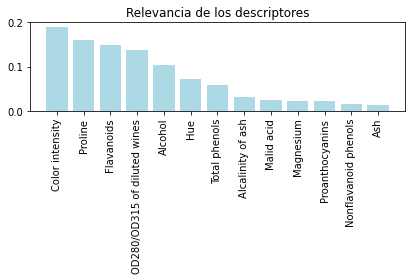

In [52]:
plt.title('Relevancia de los descriptores')
plt.bar(range(X_train.shape[1]),relevancias[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),etiquetas_descriptores[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

Recuerda guardar este notebook usando la opción *"Save in GitHub..."*.